## Sudoku

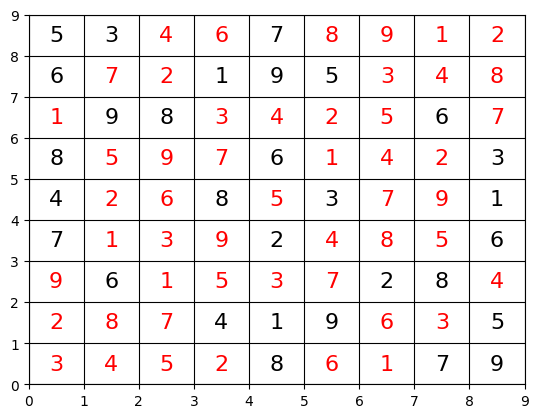

In [1]:
import numpy as np
import matplotlib.pyplot as plt

puzzle = np.array([
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
])


def search_sub_matrix(puzzle, i, j):
    h_start, h_end, v_start, v_end = None, None, None, None
    intervals = [range(0, 3), range(3, 6), range(6, 9)]
    for interval in intervals:
        if i in interval:
            h_start = interval.start
            h_end = interval.stop
        if j in interval:
            v_start = interval.start
            v_end = interval.stop
    return puzzle[h_start:h_end, v_start:v_end]


def solve(puzzle):
    # 第i行第j列
    for i in range(9):
        for j in range(9):
            sub_puzzle = search_sub_matrix(puzzle, i, j)
            if puzzle[i, j] == 0:
                for candidate_num in range(1, 10):
                    if (candidate_num not in puzzle[i, :] and 
                        candidate_num not in puzzle[:, j] and 
                        candidate_num not in sub_puzzle
                    ):
                        puzzle[i, j] = candidate_num
                        if solve(puzzle):
                            return True
                        else:
                            puzzle[i, j] = 0
                return False
    return True


def sudoku(puzzle):
    solve(puzzle)
    return puzzle


def show_result(original, solved):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(0, 10, 1))
    ax.set_yticks(np.arange(0, 10, 1))
    ax.grid(True, color='black')
    
    for i in range(9):
        for j in range(9):
            num = solved[i, j]
            if original[i, j] == 0:
                color = "red"
            else:
                color = "black"
            ax.text(j + 0.5, 8.5 - i, str(num), color=color,
                    ha='center', va='center', fontsize=16)
            
    plt.show()
    
original = puzzle.copy()
solved = sudoku(puzzle)

show_result(original, solved)

## Points dans un carré

In [37]:
import numpy as np

side = 3
points = [[0,0], [0,1], [0,2], [0,3], [3,0], [3,1], [3,2], [3,3], [1,0], [2,0], [1,3], [2,3], [3,1], [3,2]]
k = 4

def manhattan(point1: list[int], point2: list[int]):
    return np.abs(point1[0] - point2[0]) + np.abs(point1[1] - point2[1])

def is_valid(candidate_list, min_distance):
    if len(candidate_list) == 1:
        return True
    
    for p in candidate_list[1:]:
        if manhattan(p, candidate_list[0]) < min_distance:
            return False
        
    return is_valid(candidate_list[1:], min_distance)

def subpoints(points, k):
    result = []
    path = []
    
    def backtrack(start):
        if len(path) == k:
            result.append(path[:])
            return
        for i in range(start, len(points)):
            path.append(points[i])
            backtrack(i+1)
            path.pop()
            
    backtrack(0)
    return result


def distance_and_points(candidate_lists):
    min_distance = 0
    while True:
        valid_candidates = []
        for candidate_list in candidate_lists:
            if is_valid(candidate_list, min_distance):
                valid_candidates.append(candidate_list)
        if not valid_candidates:
            min_distance -= 1
            return min_distance
            
        min_distance += 1
        
        
candidate_lists = subpoints(points, k)
distance_and_points(candidate_lists)

3

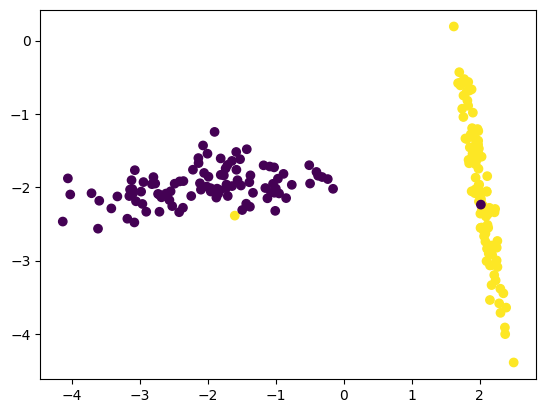

In [114]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=200,     # 样本数
    n_features=2,      # 特征维度
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=2.0,     # 类别分离度（越大越容易分）
    random_state=47
)

for i, label in enumerate(y):
    if label == 0:
        y[i] = -1

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

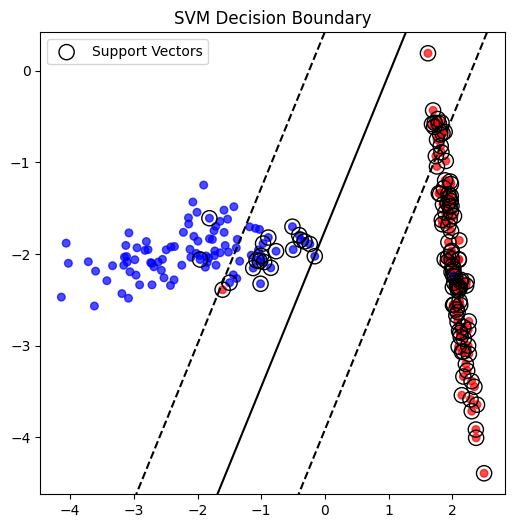

In [130]:
class SVM:
    def __init__(self, kernel, C, lr=1e-4, epochs=1000):
        # alpha : (200, 1)
        # y : (200, 1)
        # X : (200, 2)
        self.X = None
        self.y = None
        self.w = None
        self.b = None
        self.alpha = None
        self.kernel = kernel
        self.C = C
        self.lr = lr
        self.epochs = epochs
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        y = y.reshape(-1, 1)
        alpha = np.random.randn(X.shape[0], 1)
        
        for _ in range(self.epochs):
            K = X @ X.T
            Q = (y @ y.T) * K
            
            lag = -0.5 * np.sum((alpha @ alpha.T) * Q) + np.sum(alpha)
            grad_alpha = 1 - (alpha.T @ Q)
            alpha += self.lr * grad_alpha.T
            alpha = np.clip(alpha, 0, self.C)
            alpha -= (alpha.T @ y) / np.sum(y ** 2) * y
        
        self.alpha = alpha
        self.w = (alpha * y).T @ X
        self.b = y[0] - X[0] @ self.w.T
    
    def predict(self, X):
         return X @ self.w.T + self.b
    
    def visualize(self):
        plt.figure(figsize=(6,6))
    
        # 绘制样本点
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y.flatten(), cmap='bwr', s=30, alpha=0.7)
    
        # 绘制支持向量
        sv = (self.alpha > 1e-6).flatten()
        plt.scatter(self.X[sv, 0], self.X[sv, 1], s=120, facecolors='none', edgecolors='k', label='Support Vectors')
    
        # 画出分界线
        x_min, x_max = plt.xlim()
        y_min, y_max = plt.ylim()
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
        plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--','-','--'], colors='k')
    
        plt.title("SVM Decision Boundary")
        plt.legend()
        plt.show()

svm = SVM("l", 5)
svm.fit(X, y)
svm.visualize()

In [108]:
svm.predict(X[100])

array([1.31402888])